
# Wine Dataset: EDA and PCA

This Exercise uses a slightly adapted version of the Wine dataset.

1. Load and inspect the Wine dataset
2. Basic exploratory data analysis
4. Visualisations
3. Correlation analysis
5. Principal Component Analysis (PCA)


In [1]:

# Imports & display settings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seaborn style
sns.set_theme(style="whitegrid", context="notebook")


## 1. Load Data

In [23]:
df = pd.read_csv("wine_adapted.csv")
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
179,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,0
180,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
181,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0


## 2. Basic Exploration

Basic information (head, info, shape...)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       183 non-null    float64
 1   malic_acid                    183 non-null    float64
 2   ash                           181 non-null    float64
 3   alcalinity_of_ash             182 non-null    float64
 4   magnesium                     181 non-null    float64
 5   total_phenols                 183 non-null    float64
 6   flavanoids                    182 non-null    float64
 7   nonflavanoid_phenols          182 non-null    float64
 8   proanthocyanins               183 non-null    float64
 9   color_intensity               183 non-null    float64
 10  hue                           181 non-null    float64
 11  od280/od315_of_diluted_wines  183 non-null    float64
 12  proline                       182 non-null    float64
 13  targe

Summary statistics

In [25]:

print("Class distribution:")
df["target"].value_counts()


Class distribution:


target
1    72
0    62
2    49
Name: count, dtype: int64

In [26]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,183.000000,183.000000,181.000000,182.000000,181.000000,183.000000,182.000000,182.000000,183.000000,183.000000,181.000000,183.000000,182.000000,183.000000
mean,13.010874,2.341475,2.363812,19.485165,99.751381,2.299071,2.030055,0.360000,1.586120,5.058251,0.957934,2.623333,751.961538,0.928962
std,0.810104,1.115977,0.269017,3.325649,14.273482,0.624145,0.998649,0.124723,0.572897,2.287180,0.228151,0.707608,314.670544,0.777699
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.370000,1.595000,2.210000,17.200000,88.000000,1.745000,1.205000,0.270000,1.245000,3.250000,0.780000,1.980000,510.000000,0.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.360000,2.135000,0.335000,1.550000,4.700000,0.960000,2.780000,675.000000,1.000000
75%,13.685000,3.100000,2.560000,21.500000,107.000000,2.800000,2.875000,0.430000,1.950000,6.165000,1.120000,3.185000,988.750000,2.000000
max,14.830000,5.800000,3.220000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [27]:

# Mean of features per target
print("Mean feature values per target:")
means_per_target = df.groupby('target').mean(numeric_only=True)
means_per_target


Mean feature values per target:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750323,2.052742,2.460968,17.125806,106.483871,2.840645,2.979016,0.288226,1.892742,5.519516,1.059355,3.156613,1113.500000
1,12.280000,1.922083,2.226338,20.218310,94.408451,2.256806,2.079722,0.361127,1.622083,3.108750,1.059514,2.795000,520.915493
2,13.149184,3.323061,2.441667,21.408163,98.958333,1.675918,0.775714,0.449184,1.145306,7.339184,0.684490,1.696327,629.285714


In [28]:

# Standard deviation of features per target
print("Standard deviation for feature values per target:")
std_per_target = df.groupby('target').std(numeric_only=True)
std_per_target


Standard deviation for feature values per target:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,0.454706,0.734999,0.224051,2.599681,10.350801,0.331642,0.393966,0.070001,0.416024,1.209707,0.118056,0.354507,219.875505
1,0.534271,1.012389,0.294644,3.349342,16.851094,0.541791,0.700778,0.124011,0.601847,0.937394,0.204035,0.499814,156.663128
2,0.525662,1.079111,0.188469,2.235307,10.710818,0.353789,0.293201,0.123404,0.408642,2.321372,0.113927,0.283745,113.971853


In [29]:

# Variance of features per target
print("Variance of feature values per target:")
var_per_target = df.groupby('target').var(numeric_only=True)
var_per_target


Variance of feature values per target:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,0.206757,0.540224,0.050199,6.758340,107.139080,0.109986,0.155209,0.004900,0.173076,1.463392,0.013937,0.125675,48345.237705
1,0.285445,1.024932,0.086815,11.218089,283.959356,0.293538,0.491090,0.015379,0.362220,0.878707,0.041630,0.249814,24543.335614
2,0.276320,1.164480,0.035521,4.996599,114.721631,0.125166,0.085967,0.015228,0.166988,5.388766,0.012979,0.080511,12989.583333


Deal with missing values and duplicates:

In [30]:

print("Missing values per column:")
df.isna().sum()

Missing values per column:


alcohol                         0
malic_acid                      0
ash                             2
alcalinity_of_ash               1
magnesium                       2
total_phenols                   0
flavanoids                      1
nonflavanoid_phenols            1
proanthocyanins                 0
color_intensity                 0
hue                             2
od280/od315_of_diluted_wines    0
proline                         1
target                          0
dtype: int64

In [31]:
df2 = df.dropna().copy()
df2.isna().sum()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       173 non-null    float64
 1   malic_acid                    173 non-null    float64
 2   ash                           173 non-null    float64
 3   alcalinity_of_ash             173 non-null    float64
 4   magnesium                     173 non-null    float64
 5   total_phenols                 173 non-null    float64
 6   flavanoids                    173 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               173 non-null    float64
 9   color_intensity               173 non-null    float64
 10  hue                           173 non-null    float64
 11  od280/od315_of_diluted_wines  173 non-null    float64
 12  proline                       173 non-null    float64
 13  target    

In [32]:
df2.duplicated().sum()

np.int64(5)

## 3. Visualizations

Try different plots, e.g. histogram or box/violinplots or scatterplot (pick one feature)

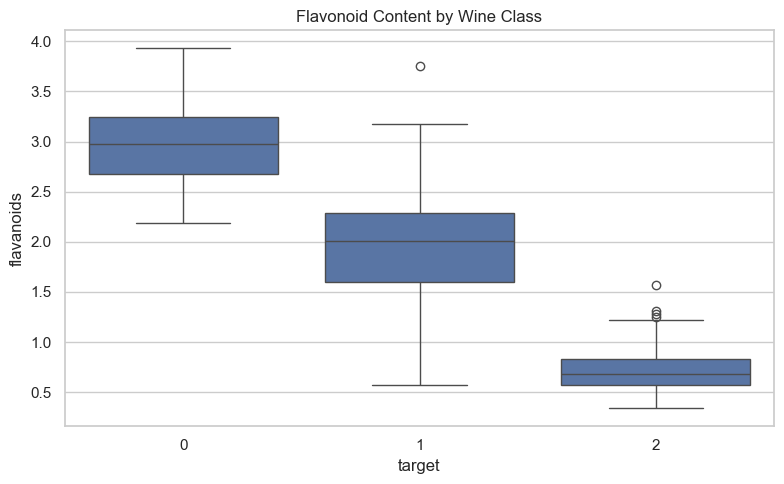

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="target", y="flavanoids", data=df2)
plt.title("Flavonoid Content by Wine Class")
plt.tight_layout()
# plt.savefig("boxplot.png", dpi=150)
plt.show()

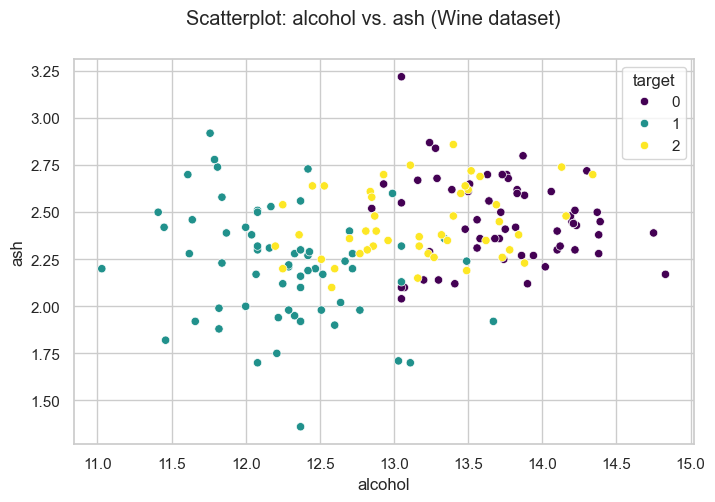

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df2, 
    x="alcohol", 
    y="ash", 
    hue="target", 
    palette="viridis"
    )
plt.suptitle("Scatterplot: alcohol vs. ash (Wine dataset)")
plt.show()

## 4. Correlation Analysis

Pairplot to spot correlations:

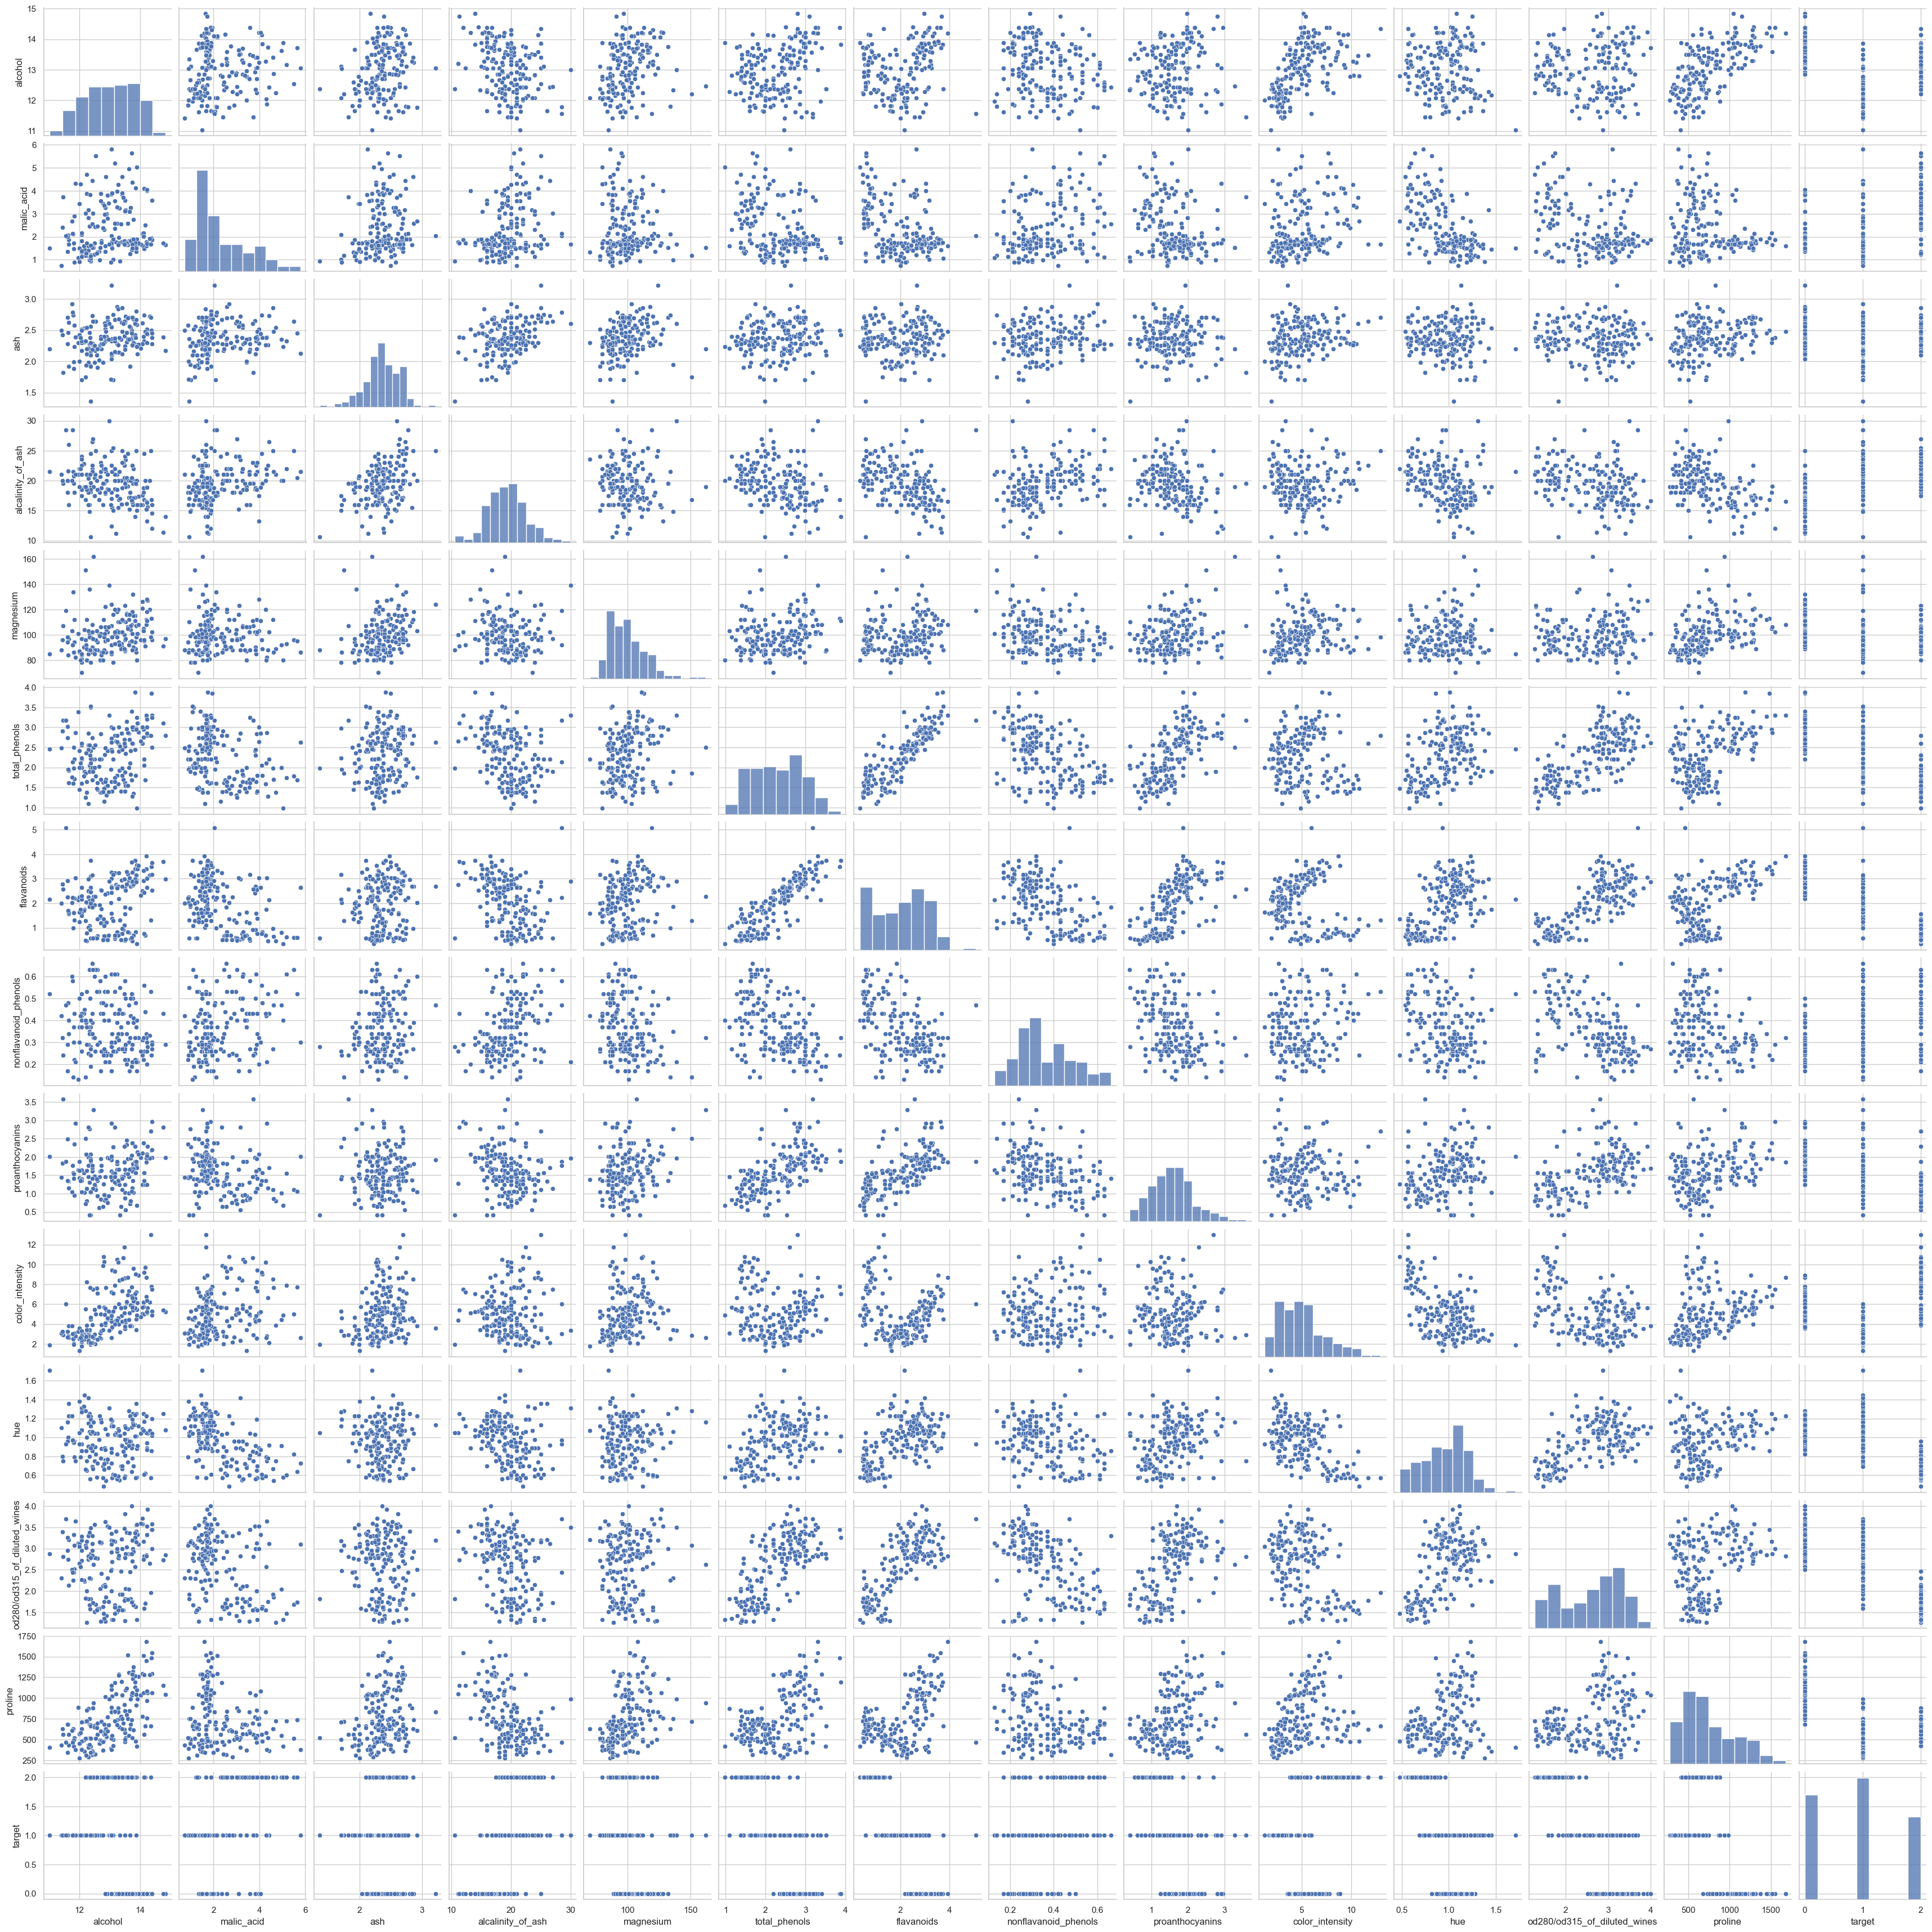

In [12]:
bad_plot = sns.pairplot(data=df)

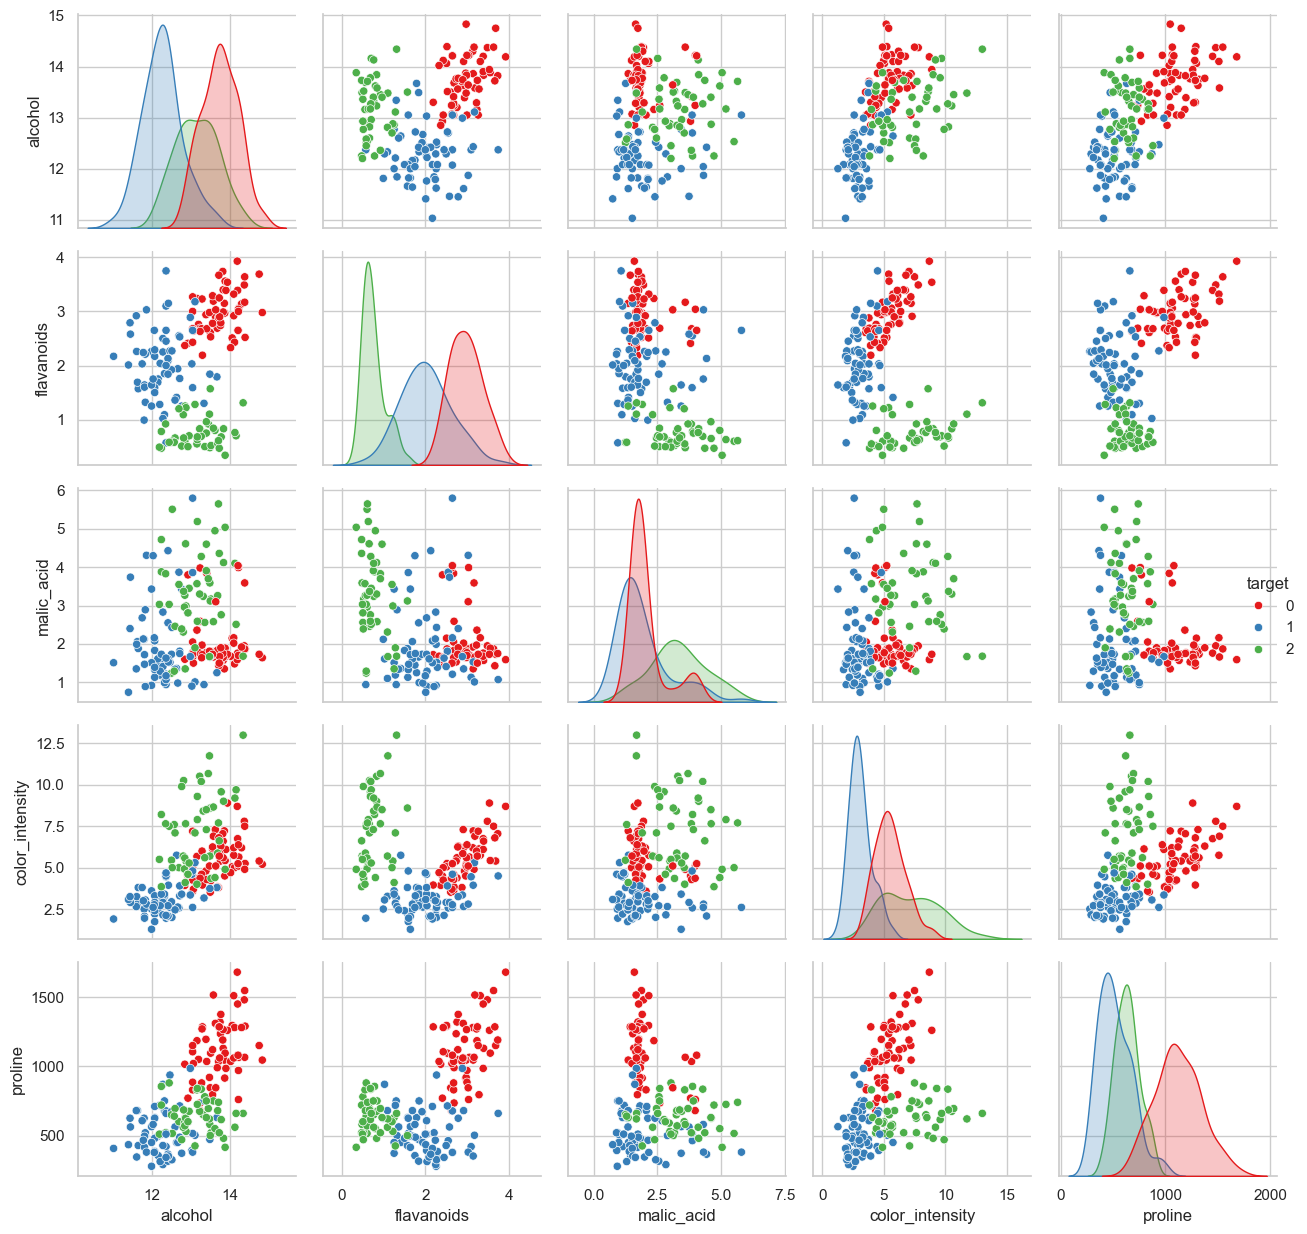

In [37]:

selected_features = ["alcohol", "flavanoids", "malic_acid", "color_intensity", "proline"]
pp = sns.pairplot(df2, vars=selected_features, hue="target", palette="Set1")
# pp.savefig("pairplot.png", dpi=150)
plt.tight_layout()
plt.show()

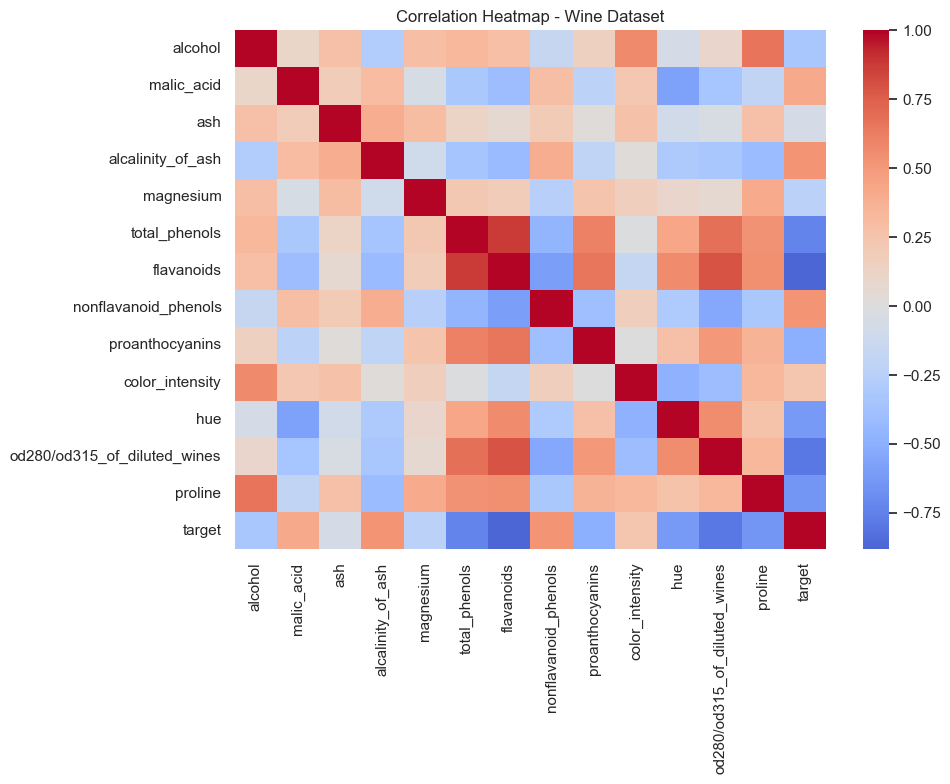

In [39]:
corr = df2.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Wine Dataset")
plt.tight_layout()
# plt.savefig("heatmap.png", dpi=150)
plt.show()


## 5. PCA

1) Separate features (X) and labels (y)

In [40]:
X = df2.drop("target", axis=1)
y = df2["target"]

2) Scale the features (Features are on different scales, all features should have same importance! Variance is depending on scale!)

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Apply PCA: `fit_transform` combines `fit` (learning from the datsa: covariance, eigenvalues, eigenvectors, PC directions) and `transform` (projecting project data onto learned components):

In [42]:
# learn from X_scaled and transform X_scaled
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# write PCs into df and add the label y
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"]).assign(target=y.values) # assign adds a new column to the df


Scatter plot for the PCs

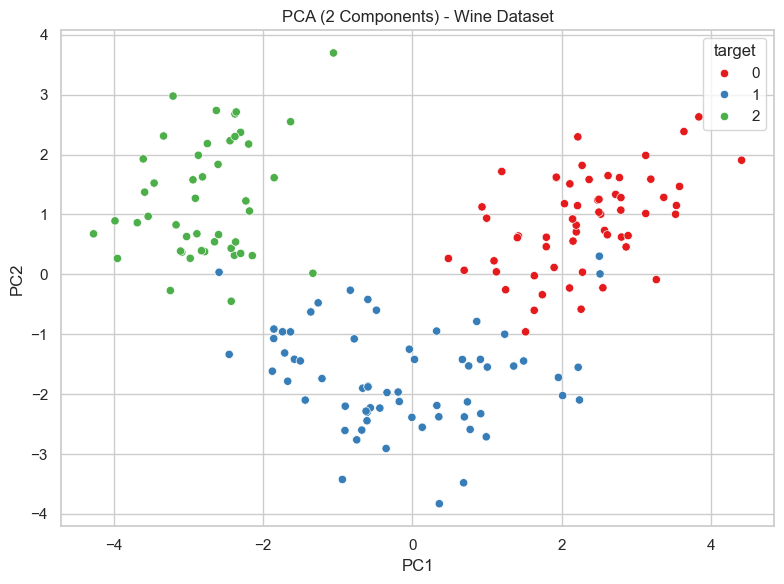

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="target", data=pca_df, palette="Set1")
plt.title("PCA (2 Components) - Wine Dataset")
plt.tight_layout()
# plt.savefig("pca_scatter.png", dpi=150)
plt.show()

Assess the information loss pof the dimensionality reduction:

In [44]:
print("Explained variance ratio (PCA):")
print(pca.explained_variance_ratio_)
print(f"Cumulative variance explained: {pca.explained_variance_ratio_.sum():.3f}")

Explained variance ratio (PCA):
[0.37137368 0.19667021]
Cumulative variance explained: 0.568


The PCA result could then be used for clustering or other predictive models...